# 5. Modelo de Regresión Regularizado

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Heart_std.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,1.198363,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,0.699073,-1.113115
1,-0.478484,-1.938163,-1.371957,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,-0.917423,0.898380
2,-1.751359,0.515952,1.198363,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,0.699073,-1.113115
3,-0.584556,-1.938163,-0.086797,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,-0.917423,0.898380
4,0.051881,0.515952,-1.371957,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,0.699073,-1.113115
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.483522,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,-0.917423,0.898380
914,1.536902,0.515952,-0.086797,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,-0.917423,0.898380
915,0.370100,0.515952,-0.086797,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,-0.917423,0.898380
916,0.370100,-1.938163,1.198363,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,-0.917423,0.898380


# Separamos la variable target

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

y = df["HeartDisease"]


# Creamos nuestro modelo

### Separamos los datos en Train y Test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Creamos un modelo de regresión lineal.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

baseline_error = mean_squared_error(y_test, lin_reg.predict(X_test))

### Creamos un modelo de regresión Ridge.

In [16]:
from sklearn.linear_model import Ridge

modelo_ridge = Ridge(alpha=8)
modelo_ridge.fit(X_train, y_train)

Ridge(alpha=8)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("El modelo tiene un porcentaje de acierto del",100*round(modelo_ridge.score(X_test, y_test),2),"%")
print('MAE test', mean_absolute_error(y_test, modelo_ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, modelo_ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, modelo_ridge.predict(X_test))))

El modelo tiene un porcentaje de acierto del 48.0 %
MAE test 0.5613561405863916
MSE test 0.503263364039993
RMSE test 0.7094105750832821


### Probamos 50 posibles combinaciones.

In [18]:
n_alphas = 50
alphas = np.logspace(-4, 3, n_alphas) 
alphas

array([1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01, 1.38949549e-01, 1.93069773e-01,
       2.68269580e-01, 3.72759372e-01, 5.17947468e-01, 7.19685673e-01,
       1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03])

In [19]:
n_alphas = 50
alphas = np.logspace(-4, 5, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [20]:
min(err_ridge)

0.5032601264484715

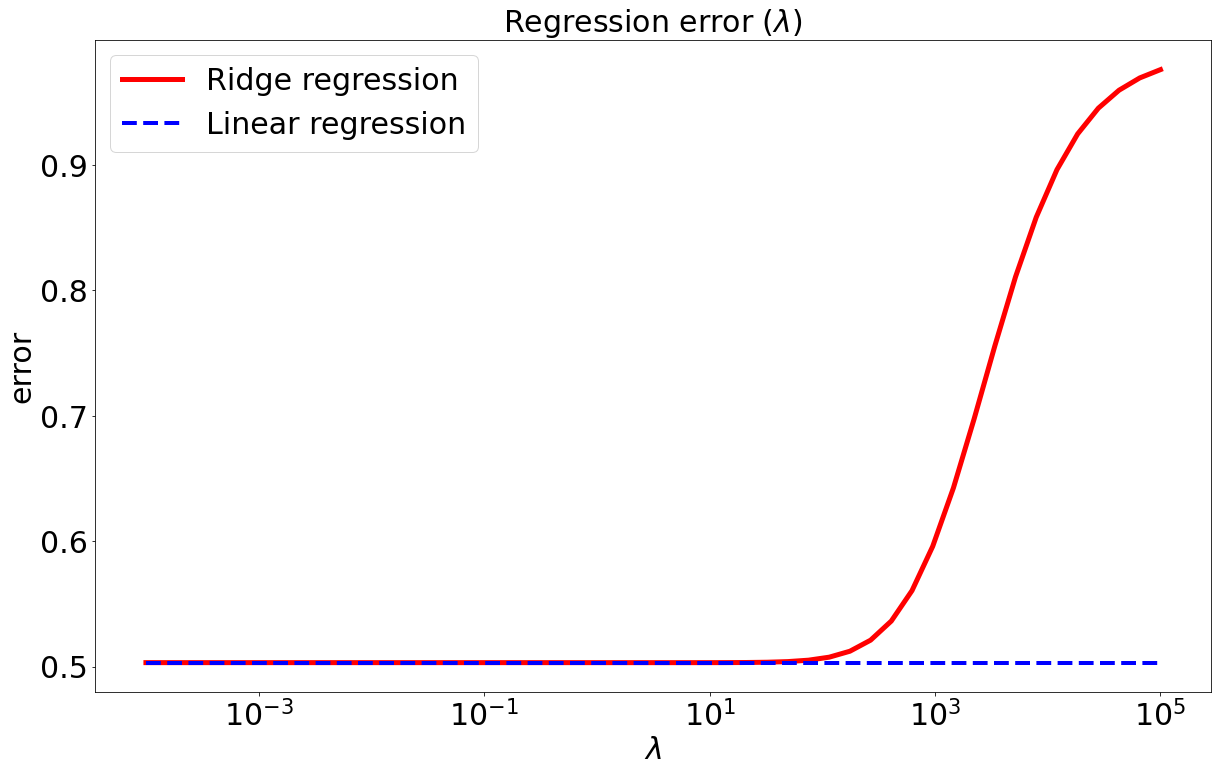

In [21]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [22]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

print("El modelo ridge tiene un porcentaje de acierto del",100*round(ridge.score(X_test, y_test),2),"%")

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

El modelo ridge tiene un porcentaje de acierto del 48.0 %
MAE test 0.5759434171299143
MSE test 0.506623917827101
RMSE test 0.7117751877012158


### Creamos un modelo de regresión Lasso.

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

print("El modelo Lasso tiene un porcentaje de acierto del",100*lasso.score(X_test, y_test),"%")

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

El modelo Lasso tiene un porcentaje de acierto del -2.286635528077774 %
MAE test 0.9925789665858086
MSE test 0.9889662983928156
RMSE test 0.9944678468370989


In [24]:
n_alphas = 100
alphas = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(X_test)
    lasso_error = mean_squared_error(y_pred, y_test)
    
    err_lasso.append(lasso_error)
    baseline.append(baseline_error)

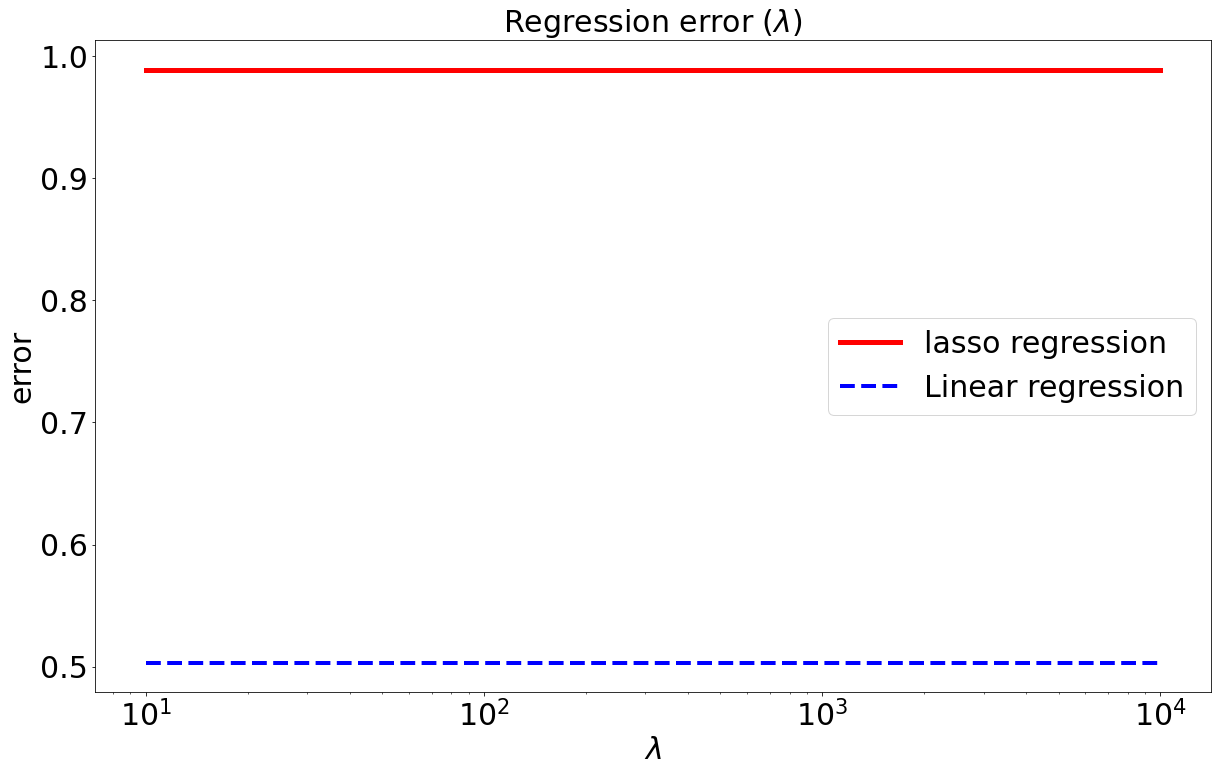

In [25]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

### Creamos un modelo de regresión Elastic Net

In [26]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=10, l1_ratio=0.5)

elastic.fit(X_train, y_train)
print("El modelo Elastic Net tiene un porcentaje de acierto del",100*elastic.score(X_test, y_test),"%")

print('MAE test', mean_absolute_error(y_test, elastic.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

El modelo Elastic Net tiene un porcentaje de acierto del -2.286635528077774 %
MAE test 0.9925789665858086
MSE test 0.9889662983928156
RMSE test 0.9944678468370989


### Hacemos un GridSeach

In [27]:
from sklearn.model_selection import GridSearchCV

elastic = ElasticNet()

parameters = {'alpha': np.logspace(-3,4,50),
              'l1_ratio': np.arange(0,1,0.01)
            }

elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error')

elastic_gs.fit(X_train, y_train)

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+02, tolerance: 4.295e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+02, tolerance: 4.311e-02 Linear regression models with null weight for the l1 regularization term are more ef

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.38949549e-03, 1.93069773e-03, 2.68269580e-03,
       3.72759372e-03, 5.17947468e-03, 7.19685673e-03, 1.00000000e-02,
       1.38949549e-02, 1.93069773e-02, 2.68269580e-02, 3.72759372e-02,
       5.17947468e-02, 7.19685673e-02, 1.00000000e-01, 1.38949549e-01,
       1.93069773e-01, 2.68269580e-01, 3.72759372e-...
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_squared_error')

In [28]:
elastic_gs.best_params_

{'alpha': 0.13894954943731375, 'l1_ratio': 0.0}

In [29]:
elastic_gs.best_estimator_

ElasticNet(alpha=0.13894954943731375, l1_ratio=0.0)

In [30]:
elastic_gs.best_score_

-0.5473335871030957

# Resultados:

In [33]:
print("Modelo ridge:",100*round(ridge.score(X_test, y_test),2),"%")
print("Modelo Lasso:",100*lasso.score(X_test, y_test),"%")
print("Modelo Elastic Net: -2.286635528077774 %")
print("Modelo Elastic Grid Search:",100*elastic_gs.score(X_test, y_test),"%")

Modelo ridge: 48.0 %
Modelo Lasso: -2.286635528077774 %
Modelo Elastic Net: -2.286635528077774 %
Modelo Elastic Grid Search: -50.597533593983215 %


### Ninguno de estos modelos es el acertado. Los modelos de regresión no funcionan para este problema.